In [1]:
import numpy as np 
import pandas as pd
fl=pd.read_csv('Iris.csv')
print(fl.head())





   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [3]:
fl = fl.rename(columns={
    'SepalLengthCm': 'SepalLength',
    'PetalLengthCm': 'PetalLength',
    'PetalWidthCm': 'PetalWidth',
    'SepalWidthCm': 'SepalWidth'
})
print(fl.head())



   Id  SepalLength  SepalWidth  PetalLength  PetalWidth      Species
0   1          5.1         3.5          1.4         0.2  Iris-setosa
1   2          4.9         3.0          1.4         0.2  Iris-setosa
2   3          4.7         3.2          1.3         0.2  Iris-setosa
3   4          4.6         3.1          1.5         0.2  Iris-setosa
4   5          5.0         3.6          1.4         0.2  Iris-setosa


In [5]:
print(fl.describe())


               Id  SepalLength  SepalWidth  PetalLength  PetalWidth
count  150.000000   150.000000  150.000000   150.000000  150.000000
mean    75.500000     5.843333    3.054000     3.758667    1.198667
std     43.445368     0.828066    0.433594     1.764420    0.763161
min      1.000000     4.300000    2.000000     1.000000    0.100000
25%     38.250000     5.100000    2.800000     1.600000    0.300000
50%     75.500000     5.800000    3.000000     4.350000    1.300000
75%    112.750000     6.400000    3.300000     5.100000    1.800000
max    150.000000     7.900000    4.400000     6.900000    2.500000


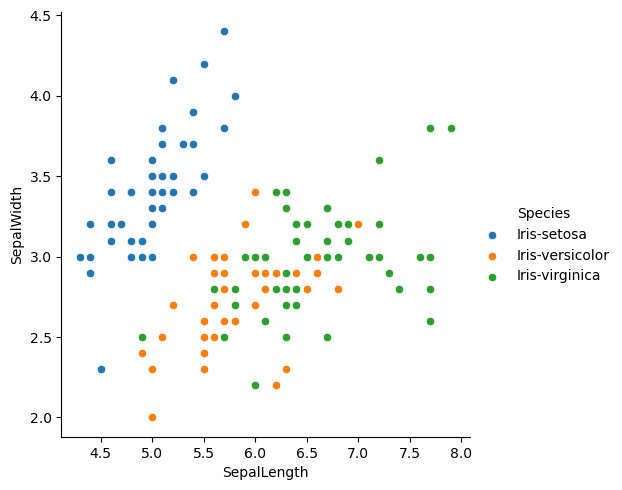

In [7]:
import seaborn as sns
g = sns.FacetGrid(fl, hue="Species", height=5)
g.map(sns.scatterplot, 'SepalLength', 'SepalWidth')
g.add_legend()


In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


fl = pd.read_csv('Iris.csv')


X = fl.drop(columns=['Id', 'Species'])  # Features
y = fl['Species']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Choose a Model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Step 6: Train the Model
model.fit(X_train, y_train)

# Step 7: Make Predictions
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
results_df = pd.DataFrame({'Actual': y_test.reset_index(drop=True), 'Predicted': y_pred})
print(results_df)







Accuracy: 1.00
             Actual        Predicted
0   Iris-versicolor  Iris-versicolor
1       Iris-setosa      Iris-setosa
2    Iris-virginica   Iris-virginica
3   Iris-versicolor  Iris-versicolor
4   Iris-versicolor  Iris-versicolor
5       Iris-setosa      Iris-setosa
6   Iris-versicolor  Iris-versicolor
7    Iris-virginica   Iris-virginica
8   Iris-versicolor  Iris-versicolor
9   Iris-versicolor  Iris-versicolor
10   Iris-virginica   Iris-virginica
11      Iris-setosa      Iris-setosa
12      Iris-setosa      Iris-setosa
13      Iris-setosa      Iris-setosa
14      Iris-setosa      Iris-setosa
15  Iris-versicolor  Iris-versicolor
16   Iris-virginica   Iris-virginica
17  Iris-versicolor  Iris-versicolor
18  Iris-versicolor  Iris-versicolor
19   Iris-virginica   Iris-virginica
20      Iris-setosa      Iris-setosa
21   Iris-virginica   Iris-virginica
22      Iris-setosa      Iris-setosa
23   Iris-virginica   Iris-virginica
24   Iris-virginica   Iris-virginica
25   Iris-virginica   I

In [17]:
new_data = np.array([[5.1, 3.5, 1.4, 0.2],  
                     [6.7, 3.1, 4.4, 1.4]])

new_data_df = pd.DataFrame(new_data, columns=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'])
new_predictions = model.predict(new_data_df)

for i, prediction in enumerate(new_predictions):
    print(f"Data point {i + 1}: Predicted species is {prediction}")

Data point 1: Predicted species is Iris-setosa
Data point 2: Predicted species is Iris-versicolor


In [19]:
from sklearn.linear_model import LogisticRegression


X = fl.drop(columns=['Id', 'Species']) 
y = fl['Species']  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


log_reg = LogisticRegression(max_iter=200)  
log_reg.fit(X_train, y_train)


y_pred = log_reg.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

Accuracy: 1.00


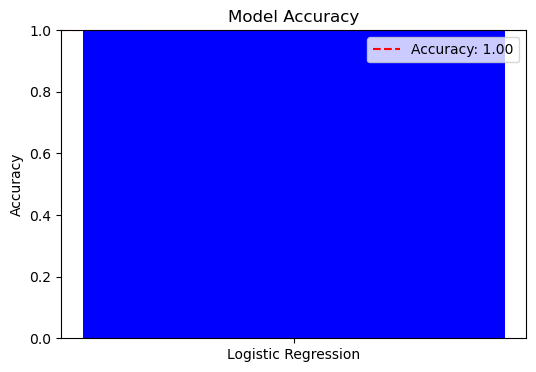

In [21]:
accuracy = accuracy_score(y_test, y_pred)
plt.figure(figsize=(6, 4))
plt.bar(['Logistic Regression'], [accuracy], color='blue')
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.axhline(y=accuracy, color='red', linestyle='--', label=f'Accuracy: {accuracy:.2f}')
plt.legend()
plt.show()